Problem Statement:
1. Prepare the data-set using several methos to train the model
2. Build a model which gives high accuracy of predicting diabetes.

In [79]:
#Installing necessary Packages and libraries
#!pip install -U scikit-learn
import numpy as np
import pandas as pd


#data sourcing:import the dataset
df=pd.read_csv("/content/archive (2).zip")
#print(df.shape)#total entries=768*9=6912
#DATA CLEANING<->EDA<->DATA PROCESSING
#1.DATA CLEANING
#A.Handling Missing values
# df.info() #all entries are non null
#B.feature scaling
#normalising data(ranging between 0 to 1)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler();
new_data=scaler.fit_transform(df)
df = pd.DataFrame(new_data, columns=df.columns)
df.head()
#C.outlier treatment
# Detect outliers using Local Outlier Factor
from sklearn.ensemble import IsolationForest
clf = IsolationForest(contamination=0.05)  # Adjust contamination based on expected outlier percentage
clf.fit(df)
outliers = clf.predict(df)
#outliers
#In outlier array :
#outlier[i]==1 {inliner}
#outlier[i]==-1{outlier}
count=0;#Number of outliners
for i in outliers:
  if i==-1:
    count=count+1
#numner of outliner is 39 in 6912 entries  =0.56%
#dropping outliner entries from datset
outlier_indices = np.where(outliers == -1)[0]
df = df.drop(outlier_indices)

# Reset index if needed
df.reset_index(drop=True, inplace=True)








/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  # for stateless transformers.


<ipython-input-80-62070eecdb1a>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_outcome_1['Age'], label='Outcome 1', shade=True)
<ipython-input-80-62070eecdb1a>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_outcome_0['Age'], label='Outcome 0', shade=True)


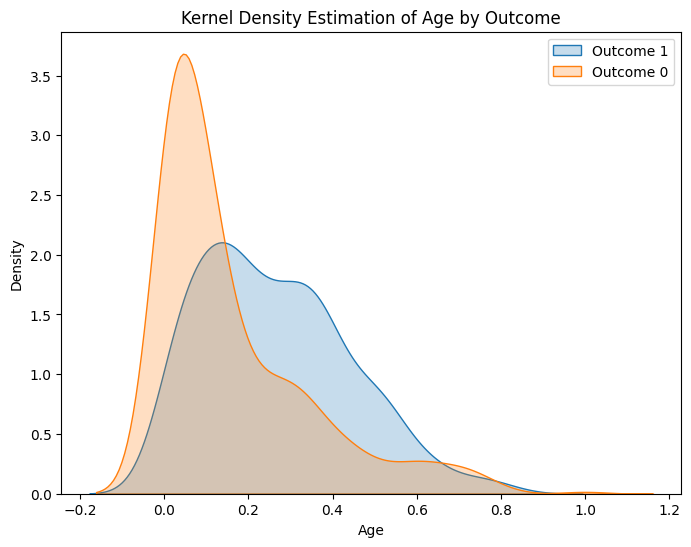

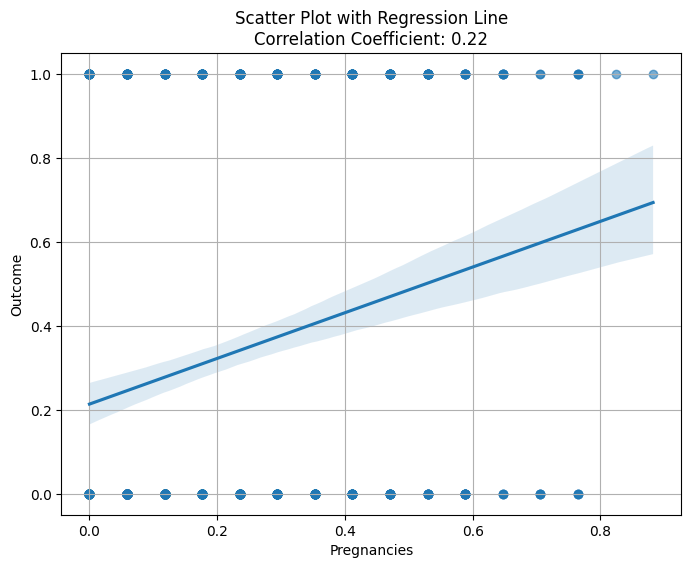

In [80]:
#2.EXPLORATORY DATA ANALYSIS
import matplotlib.pyplot as plt

# Plot KDE for 'Age' by 'Outcome'
import seaborn as sns
plt.figure(figsize=(8, 6))
df_outcome_1 = df[df['Outcome'] == 1]
df_outcome_0 = df[df['Outcome'] == 0]
sns.kdeplot(data=df_outcome_1['Age'], label='Outcome 1', shade=True)
sns.kdeplot(data=df_outcome_0['Age'], label='Outcome 0', shade=True)
plt.title('Kernel Density Estimation of Age by Outcome')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()
corr_coeff = df['Pregnancies'].corr(df['Outcome'])

# Create scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='Pregnancies', y='Outcome', data=df, scatter_kws={'alpha':0.6})
plt.title(f'Scatter Plot with Regression Line\nCorrelation Coefficient: {corr_coeff:.2f}')
plt.xlabel('Pregnancies')
plt.ylabel('Outcome')
plt.grid(True)
plt.show()





In [81]:
#divide into independent and dependent features
X=df.iloc[:, :-1]
X.head()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000


In [82]:
Y=df.iloc[:, -1]
Y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Outcome, dtype: float64

In [83]:
#classification problem
#MODEL BUILDING
#apply train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#model 1:Logistic regression
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(random_state=0) #parameters??
model1.fit(X_train, y_train)
y_pred=model1.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report


In [84]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.821917808219178

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.96      0.88        99
         1.0       0.86      0.53      0.66        47

    accuracy                           0.82       146
   macro avg       0.84      0.75      0.77       146
weighted avg       0.83      0.82      0.81       146



In [85]:
#model 2:naive bais
from sklearn.naive_bayes import GaussianNB #(#study??gaussian nb for continous features and multinomial naive bais for discrete features)
from sklearn.metrics import accuracy_score, classification_report
model2 = GaussianNB()
model2.fit(X_train, y_train)

# Predicting on the test set
y_pred = model2.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8082191780821918

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86        99
         1.0       0.72      0.66      0.69        47

    accuracy                           0.81       146
   macro avg       0.78      0.77      0.78       146
weighted avg       0.80      0.81      0.81       146



In [86]:
#model 3:knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
model3 = KNeighborsClassifier(n_neighbors=50)
model3.fit(X_train, y_train)

# Predicting on the test set
y_pred = model3.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.773972602739726

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.96      0.85        99
         1.0       0.82      0.38      0.52        47

    accuracy                           0.77       146
   macro avg       0.79      0.67      0.69       146
weighted avg       0.78      0.77      0.75       146



In [87]:
#apply grid search over a range of n_neighbors with cross validation for optimal value of k
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11]}
# Initialize GridSearchCV
grid_search = GridSearchCV(model3, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

# Predicting on the test set with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

Best Parameters: {'n_neighbors': 3}
Best Cross-validation Accuracy: 0.729059829059829
Accuracy on Test Set: 0.773972602739726


In [88]:
#model4:random forest classifier
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(n_estimators=1000, random_state=42)
model4.fit(X_train, y_train)

# Predicting on the test set
y_pred = model4.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy) ##important
# input_data = np.array([1, 126, 60, 0, 0, 30.1, 0.349,47])
# reshaped_data = input_data.reshape(1, -1)  # Reshape to 2D array
# ##step

# # Make prediction
# x = model4.predict(reshaped_data)
# x



Accuracy: 0.773972602739726


Coclussion : We have build Four ML models using different Ml algorithms .Out of which Model1 which uses Logistic Regression gives highest accuracy of 82%.